In [1]:
# ===== Core Python & Data Libraries =====
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import operator
import warnings
warnings.filterwarnings("ignore")

# ===== TensorFlow / Keras =====
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, Conv2D, Dense, BatchNormalization, Flatten,
    MaxPooling1D, Dropout, LSTM, SimpleRNN
)
from tensorflow.keras.utils import to_categorical

# ===== Scikit-learn =====
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import plot_tree
from sklearn import tree

# ===== Colab Upload Tools =====
from google.colab import files
import io

print("✅ All libraries imported successfully.")


✅ All libraries imported successfully.


In [2]:
# --- STEP 1: Upload cleaned climate dataset ---
print("📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
climate = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded cleaned climate dataset: {first_file}")

# Preview
print("\n🌦 Climate data preview:")
display(climate.head())


# --- STEP 2: Upload prediction dataset ---
print("\n📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
prediction = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded prediction dataset: {first_file}")

# Preview
print("\n🔎 Prediction data preview:")
display(prediction.head())


📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)


Saving climate_clean_data_new.csv to climate_clean_data_new.csv
✅ Loaded cleaned climate dataset: climate_clean_data_new.csv

🌦 Climate data preview:


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4



📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'


Saving Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv to Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv
✅ Loaded prediction dataset: Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv

🔎 Prediction data preview:


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
ljubljana_list = [col for col in climate.columns if 'LJUBLJANA' in col.upper()]
ljubljana_list

['LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max']

In [4]:
df_ljubljana = climate[ljubljana_list]
df_ljubljana

,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max
0,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5
1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5
2,8,0.96,1.0173,0.20,0.12,0.0,4.6,0.9,6.3
3,6,0.94,1.0173,0.49,0.00,2.2,3.2,1.0,7.0
4,7,0.94,1.0173,0.20,0.00,0.0,3.6,0.4,4.8
...,...,...,...,...,...,...,...,...,...
22945,4,0.80,1.0289,1.35,0.37,5.9,14.7,12.1,21.1
22946,3,0.82,1.0291,1.35,0.37,4.5,12.9,9.8,19.8
22947,3,0.81,1.0270,1.35,0.37,5.1,13.2,10.2,20.7
22948,3,0.77,1.0238,1.35,0.37,5.7,14.0,10.0,23.1


In [5]:
answers_ljubljana = prediction['LJUBLJANA_pleasant_weather']
answers_ljubljana

,LJUBLJANA_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [6]:
df_ljubljana.shape


(22950, 9)

In [7]:
answers_ljubljana.shape


(22950,)

In [8]:
X2 = df_ljubljana

In [9]:
y2 = answers_ljubljana

In [10]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [11]:
X.shape

(22950, 9)

In [12]:
y.shape

(22950,)

In [13]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [15]:
X_train

array([[ 6.    ,  0.76  ,  1.0128, ..., 19.2   , 14.2   , 26.8   ],
       [ 2.    ,  0.83  ,  1.02  , ..., -4.4   , -8.2   , -1.3   ],
       [ 8.    ,  0.95  ,  1.0121, ...,  0.6   , -0.6   ,  1.2   ],
       ...,
       [ 8.    ,  0.96  ,  1.0172, ...,  8.9   ,  6.7   , 12.    ],
       [ 6.    ,  0.74  ,  1.0122, ..., 15.8   , 13.4   , 21.    ],
       [ 6.    ,  0.73  ,  1.0168, ..., 11.9   ,  5.4   , 19.8   ]])

In [16]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
X_test

array([[ 8.    ,  0.88  ,  1.0149, ..., 18.5   , 15.    , 24.8   ],
       [ 7.    ,  0.7   ,  1.0227, ..., -1.    , -4.8   ,  2.    ],
       [ 6.    ,  0.88  ,  1.0108, ..., 18.7   , 15.1   , 21.4   ],
       ...,
       [ 2.    ,  0.86  ,  1.0203, ...,  8.5   ,  4.    , 17.8   ],
       [ 2.    ,  0.57  ,  1.0222, ..., 10.2   ,  3.    , 18.2   ],
       [ 1.    ,  0.49  ,  1.0142, ..., 24.3   , 16.5   , 31.7   ]])

In [18]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [19]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


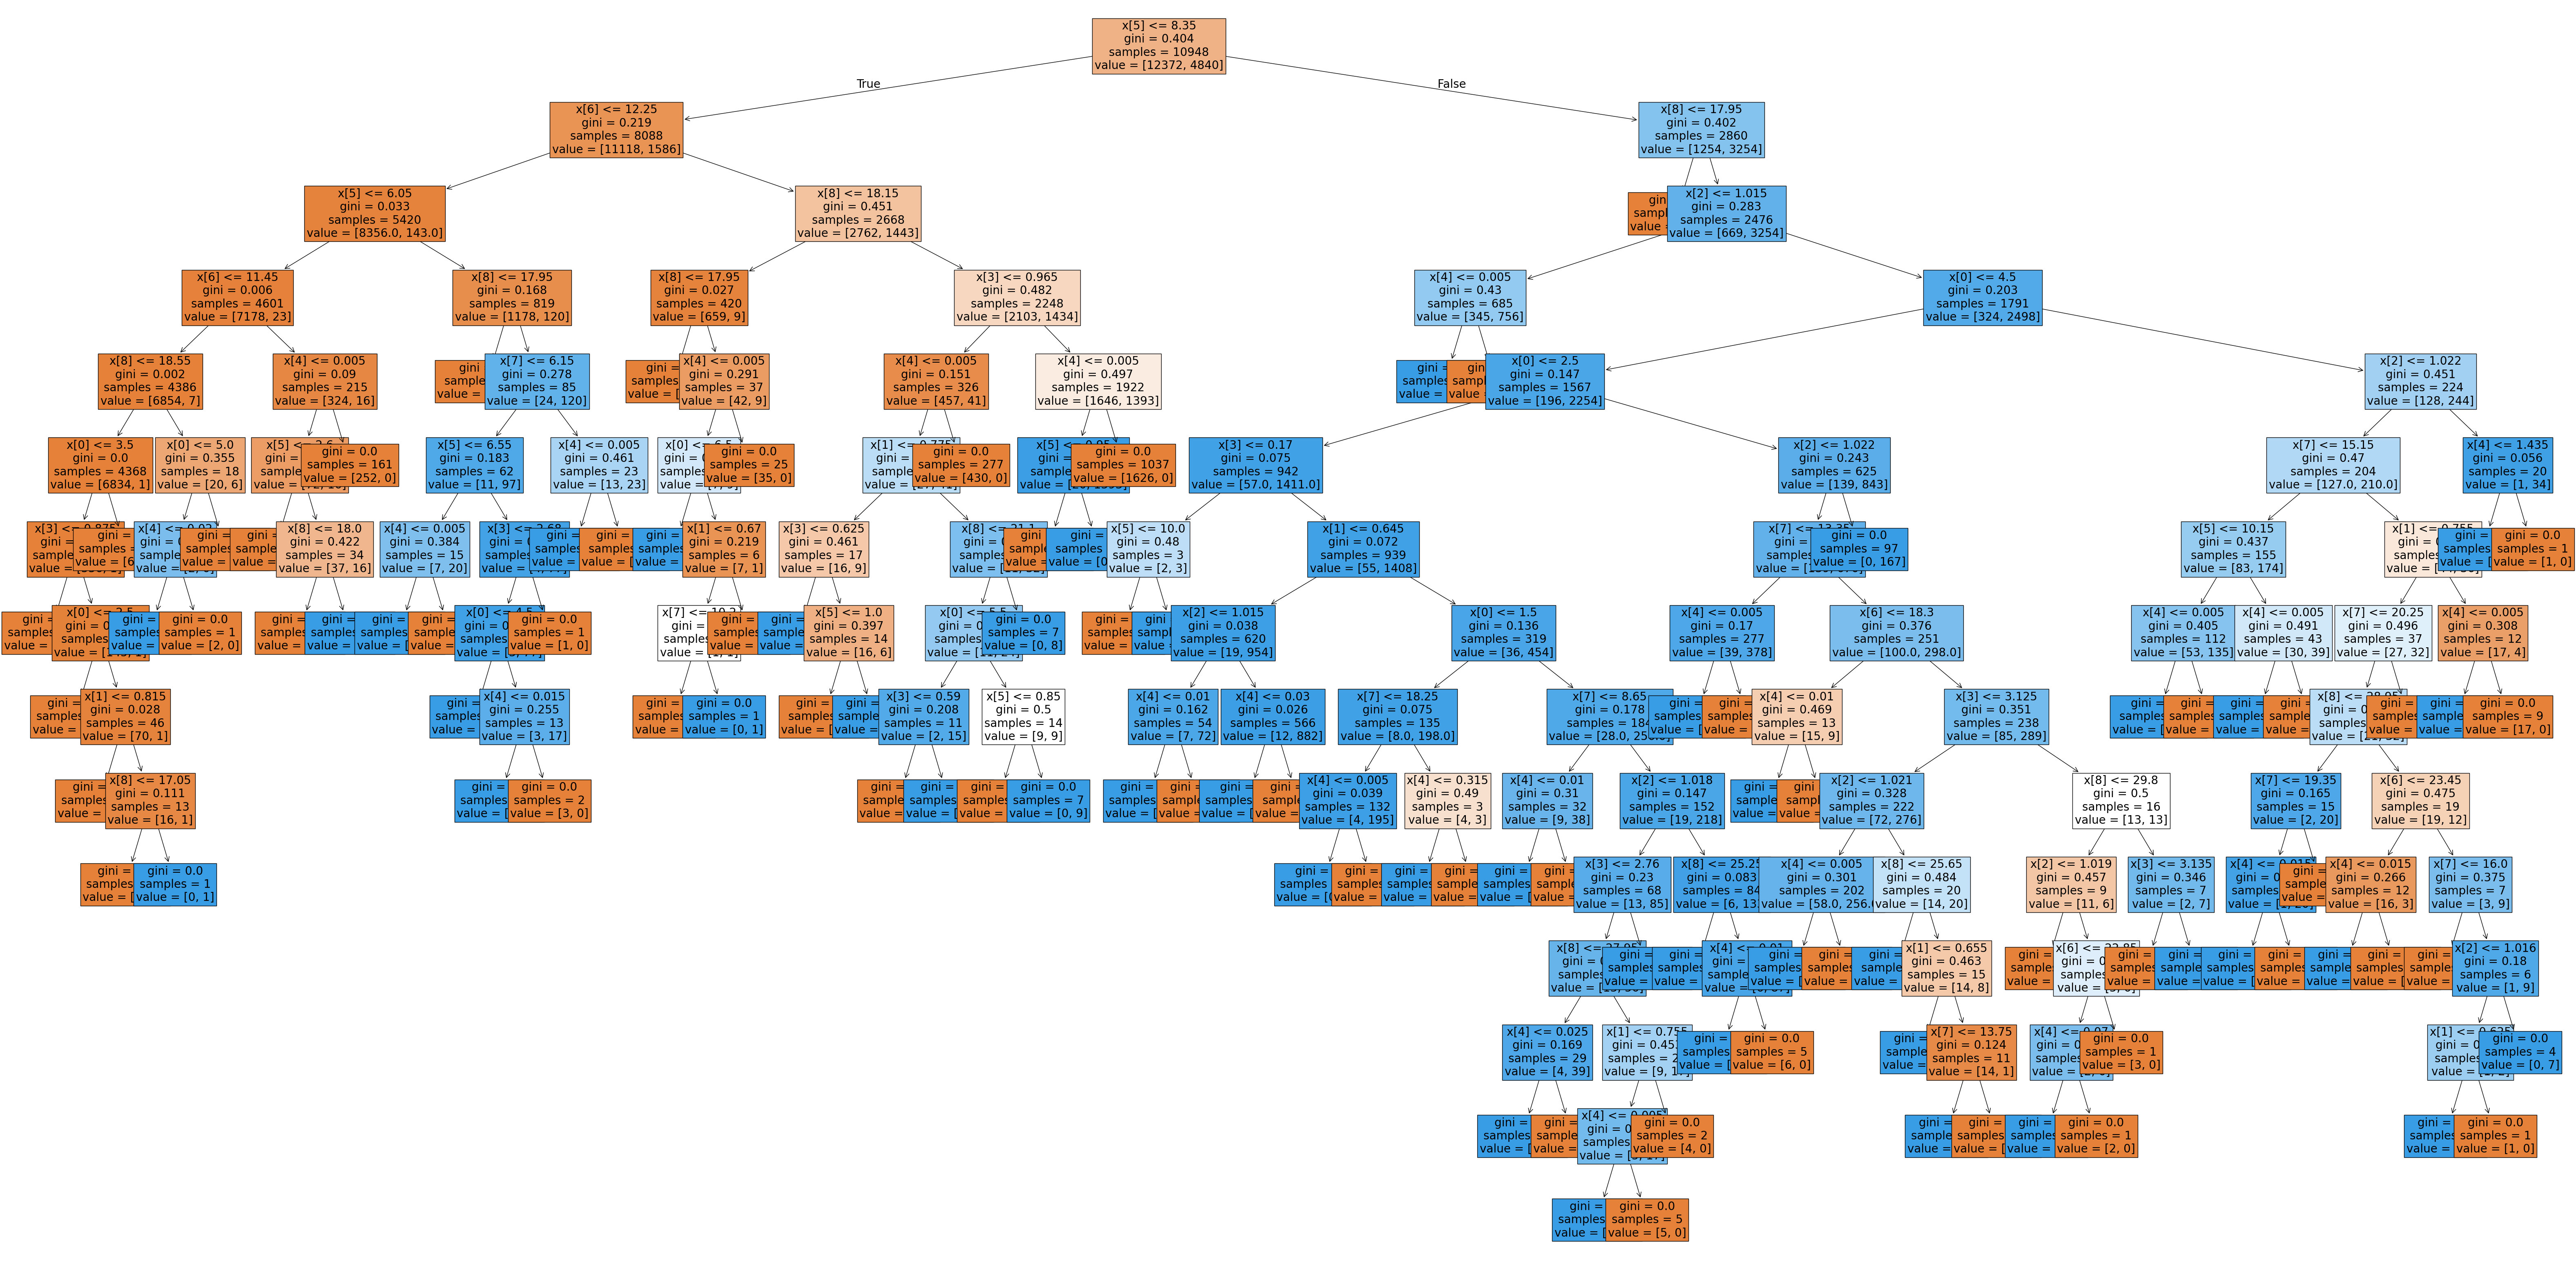

In [21]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [22]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04698412, 0.01174782, 0.00865548, 0.105604  , 0.3624206 ,
       0.08502723, 0.1103311 , 0.01395718, 0.25527248])

In [23]:
# Create a list of weather features for Ljubljana
wx_list = [feature.replace('LJUBLJANA_', '') for feature in ljubljana_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [24]:
important = pd.Series(newarray, index = wx_list)
important

,0
cloud_cover,0.046984
humidity,0.011748
pressure,0.008655
global_radiation,0.105604
precipitation,0.362421
sunshine,0.085027
temp_mean,0.110331
temp_min,0.013957
temp_max,0.255272


['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


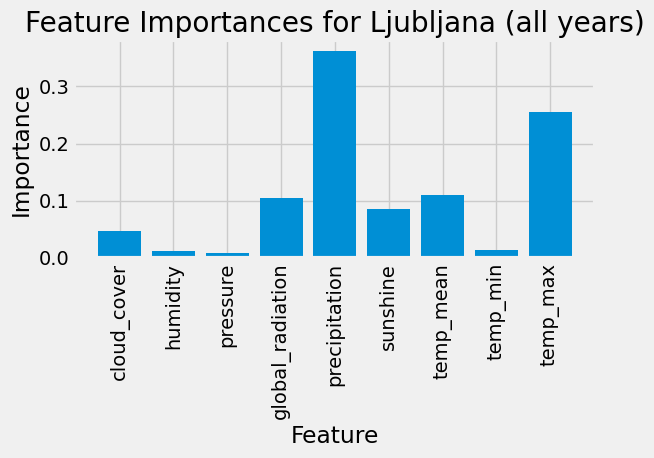

In [25]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation='vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances for Ljubljana (all years)')
plt.tight_layout()
plt.show()
